## Setup

In [1]:
import geodata
import xarray as xr
import logging
import matplotlib.pyplot as plt
from osgeo import gdal
import pandas as pd
logging.basicConfig(level=logging.INFO)
import warnings
warnings.filterwarnings('ignore')

## Fetch data

In [2]:
#Get the Merra2 data in 2011.1
DS_monthly_chn = geodata.Dataset(module="merra2",
                     years=slice(2011, 2011),
                     months=slice(1,1),
                     weather_data_config = "surface_flux_monthly")
if DS_monthly_chn.prepared == False:
    DS_monthly_chn.get_data()

INFO:geodata.dataset:Directory E:\Rambo!!!!\geodata\data\merra2 found, checking for completeness.
INFO:geodata.dataset:Directory complete.


In [3]:
ds = xr.open_dataset(DS_monthly_chn.downloadedFiles[0][1])
DS_monthly_chn.trim_variables()
## Variables after trimming
ds = xr.open_dataset(DS_monthly_chn.downloadedFiles[0][1])
list(ds.data_vars)

## Make Cutout

In [5]:
## CUTOUT of China in 2011.1. The longitude is within the range [73,136] and the lattitude is within the range[18.54].
cutout = geodata.Cutout(name = "china-2011-1-test",
                       module = "merra2",
                       weather_data_config = "surface_flux_monthly",
                       xs = slice(73, 136),
                       ys = slice(18, 54),
                       years = slice(2011, 2011), 
                       months = slice(1,1))
cutout.prepare()
cutout.__dict__

INFO:geodata.cutout:All cutout (china-2011-1-test, E:\Rambo!!!!\geodata\data\cutouts) files available.
INFO:geodata.preparation:[4, 1, 1, 10]
INFO:geodata.cutout:Cutout subset prepared: <Cutout china-2011-1-test x=73.12-135.62 y=18.00-54.00 time=2011/1-2011/1 prepared>
INFO:geodata.preparation:The cutout is already prepared. If you want to recalculate it, supply an `overwrite=True` argument.


{'name': 'china-2011-1-test',
 'cutout_dir': 'E:\\Rambo!!!!\\geodata\\data\\cutouts\\china-2011-1-test',
 'prepared': True,
 'meta_append': 0,
 'config': 'surface_flux_monthly',
 'meta': <xarray.Dataset>
 Dimensions:     (time: 1, x: 101, y: 73, year-month: 1)
 Coordinates:
   * x           (x) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
   * y           (y) float64 18.0 18.5 19.0 19.5 20.0 ... 52.5 53.0 53.5 54.0
   * time        (time) datetime64[ns] 2011-01-01
     lon         (x) float64 ...
     lat         (y) float64 ...
   * year-month  (year-month) MultiIndex
   - year        (year-month) int64 2011
   - month       (year-month) int64 1
 Data variables:
     *empty*
 Attributes:
     History:                           Original file generated: Mon Jun 22 23...
     Filename:                          MERRA2_400.tavgM_2d_flx_Nx.201101.nc4
     Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
     Conventions:                       CF-1
 

In [6]:
cutout.coords

Coordinates:
  * x           (x) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
  * y           (y) float64 18.0 18.5 19.0 19.5 20.0 ... 52.5 53.0 53.5 54.0
  * time        (time) datetime64[ns] 2011-01-01
    lon         (x) float64 ...
    lat         (y) float64 ...
  * year-month  (year-month) MultiIndex
  - year        (year-month) int64 2011
  - month       (year-month) int64 1

In [8]:
# Get the wind data by using geodata.convert.wind from the merra2 cutout 
ds_wind = geodata.convert.wind(cutout,
                               turbine='Suzlon_S82_1.5_MW',
                               smooth=True, 
                               var_height='lml')
ds_wind

<xarray.DataArray (time: 1, y: 73, x: 101)>
array([[[0.02014039, 0.025782  , 0.02271231, ..., 0.59035825,
         0.57860215, 0.56344352],
        [0.02125767, 0.02074308, 0.01410224, ..., 0.56713468,
         0.55380957, 0.53740686],
        [0.01712153, 0.01659648, 0.00947699, ..., 0.53907608,
         0.52184841, 0.50636445],
        ...,
        [0.00924701, 0.00816818, 0.00911262, ..., 0.00658347,
         0.04304676, 0.06909421],
        [0.00914878, 0.00966224, 0.01023961, ..., 0.00792092,
         0.0642353 , 0.13747146],
        [0.01111723, 0.01150966, 0.01079445, ..., 0.00424388,
         0.08917244, 0.26786677]]])
Coordinates:
  * x        (x) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
  * y        (y) float64 18.0 18.5 19.0 19.5 20.0 ... 52.0 52.5 53.0 53.5 54.0
  * time     (time) datetime64[ns] 2011-01-01T00:30:00
    lon      (x) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
    lat      (y) float64 18.0 18.5 19.0 19.5 20.0 ... 52.0 52.5 53.0 53.5 54.0

In [13]:
df_wind = ds_wind.to_dataframe(name='wind')
df_wind = df_wind.reset_index(drop = True)
df_wind.head()

,lon,lat,wind
0,73.125,18.0,0.020140
1,73.750,18.0,0.025782
2,74.375,18.0,0.022712
3,75.000,18.0,0.026013
4,75.625,18.0,0.038022


In [14]:
df_wind['lat'].unique()

array([18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. ,
       23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5,
       29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. ,
       34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5,
       40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5, 45. ,
       45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. , 50.5,
       51. , 51.5, 52. , 52.5, 53. , 53.5, 54. ])

## Get the forest data from the nc file

In [10]:
#gdal_ds = gdal.Translate('FINAL_GRID_5BINS_FOREST_MED.nc', 'FINAL_GRID_5BINS_FOREST_MED.tif', format = 'NetCDF')
xarray_ds = xr.open_dataset('FINAL_GRID_5BINS_FOREST_MED.nc')

forest_df = xarray_ds.to_dataframe()
# forest_df['Band1'].unique()

In [11]:
forest_df['Band1'] = forest_df['Band1'].fillna(0).astype(int)
forest = forest_df.reset_index()

In [12]:
forest.shape

(31802560, 4)

## Change the resolution of df_wind to that of forest_df

In [16]:
def change_resolution(lon_lat_pair, df):
    smallest_lon = 73.125
    smallest_lat = 18
    step_lon = 0.625
    step_lat = 0.5
    new_df = pd.DataFrame(columns = ['lon', 'lat', 'wind'])
    dfs = []
    for i in lon_lat_pair:
        lon_wind = float(abs(i[0] - smallest_lon)//step_lon) * step_lon + smallest_lon
        lat_wind = float(abs(i[1] - smallest_lat)//step_lat) * step_lat + smallest_lat
        #print(lon_wind, lat_wind)
        row = df[df['lon'] == lon_wind][df['lat'] == lat_wind]
        row['lon'] = i[0]
        row['lat'] = i[1]
        row = row.reset_index(drop = True)
        dfs.append(row)
    new_df = pd.concat(dfs, axis = 0)
    return new_df.reset_index(drop = True)

In [17]:
#We picked a part of the map for testing
forest_test = forest.iloc[130000:180000]
lat_test = forest_test['lat'].values
lon_test = forest_test['lon'].values
lon_lat_test = []
for i in range(len(lat_test)):
    lon_lat_test.append((lon_test[i], lat_test[i]))
result_test = change_resolution(lon_lat_test, df_wind)
result_test.head()

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,lon,lat,wind
0,114.670833,18.1375,0.88723
1,114.679167,18.1375,0.88723
2,114.687500,18.1375,0.88723
3,114.695833,18.1375,0.88723
4,114.704167,18.1375,0.88723


In [19]:
# Append the band column to the wind dataframe
final_band = forest_test['Band1'].reset_index(drop = True)
result_test['band'] = final_band
result_test.head()

,lon,lat,wind,band
0,114.670833,18.1375,0.88723,1
1,114.679167,18.1375,0.88723,1
2,114.687500,18.1375,0.88723,1
3,114.695833,18.1375,0.88723,1
4,114.704167,18.1375,0.88723,1


In [20]:
result_test['mask'] = result_test['wind'] * result_test['band']
result_test.set_index(['lon', 'lat'])

,,wind,band,mask
lon,lat,,,
114.670833,18.137500,0.887230,1,0.887230
114.679167,18.137500,0.887230,1,0.887230
114.687500,18.137500,0.887230,1,0.887230
114.695833,18.137500,0.887230,1,0.887230
114.704167,18.137500,0.887230,1,0.887230
...,...,...,...,...
101.962499,18.195834,0.037241,1,0.037241
101.970833,18.195834,0.037241,1,0.037241
101.979166,18.195834,0.037241,1,0.037241


## Plot the result

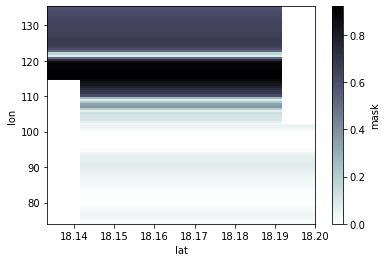

In [26]:
result_test.to_xarray()['mask'].plot(cmap = "bone_r")